<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://gfif.udea.edu.co/root/tmva/img/tmva_logo.gif">

# Variance Threshold Transformation
<hr style="border-top-width: 4px; border-top-color: #34609b;"> 

In [1]:
import ROOT
from ROOT import TFile, TMVA, TCut

Welcome to JupyROOT 6.07/07


## Declare Factory and DataLoader

In [2]:
outputFile = TFile("VTOutput.root", "RECREATE")
inputFile  = TFile("mydataset.root")

TMVA.Tools.Instance()

factory = TMVA.Factory("TMVAClassification",
                       outputFile,
                       "!V:ROC:!Correlations:!Silent:Color:!DrawProgressBar:AnalysisType=Classification")
   
loader = TMVA.DataLoader("mydataset")

--- Factory                  : You are running ROOT Version: 6.07/07, Apr 1, 2016
--- Factory                  : 
--- Factory                  : _/_/_/_/_/ _|      _|  _|      _|    _|_|   
--- Factory                  :    _/      _|_|  _|_|  _|      _|  _|    _| 
--- Factory                  :   _/       _|  _|  _|  _|      _|  _|_|_|_| 
--- Factory                  :  _/        _|      _|    _|  _|    _|    _| 
--- Factory                  : _/         _|      _|      _|      _|    _| 
--- Factory                  : 
--- Factory                  : ___________TMVA Version 4.2.1, Feb 5, 2015
--- Factory                  : 


## Adding variables to DataLoader

In [3]:
# Adding variables to dataset
loader.AddVariable("var0", 'F')
loader.AddVariable("var1", 'F')
loader.AddVariable("var2", 'F')
loader.AddVariable("var3 := var0-var1", 'F')
loader.AddVariable("var4 := var0*var2", 'F')
loader.AddVariable("var5 := var1+var2", 'F')

## Setting up dataset from Trees

In [4]:
print "--- TMVAClassification       : Using input file:", inputFile.GetName()
   
# Register the training and test trees

tsignal     = inputFile.Get("MyMCSig")
tbackground = inputFile.Get("MyMCBkg")
     
signalWeight     = 1.0
backgroundWeight = 1.0
    
mycuts = TCut("")
mycutb = TCut("")

loader.AddSignalTree(tsignal, signalWeight)
loader.AddBackgroundTree(tbackground, backgroundWeight)
loader.fSignalWeight = signalWeight
loader.fBackgroundWeight = backgroundWeight
loader.fTreeS = tsignal
loader.fTreeB = tbackground
loader.PrepareTrainingAndTestTree(mycuts,
                                  mycutb,
                                  "nTrain_Signal=3000:nTrain_Background=3000:nTest_Signal=1449:nTest_Background=1449:SplitMode=Random:NormMode=NumEvents:!V")

--- TMVAClassification       : Using input file: mydataset.root
--- DataSetInfo              : Dataset[mydataset] : Added class "Signal"	 with internal class number 0
--- mydataset                : Add Tree MyMCSig of type Signal with 5449 events
--- DataSetInfo              : Dataset[mydataset] : Added class "Background"	 with internal class number 1
--- mydataset                : Add Tree MyMCBkg of type Background with 5449 events
--- mydataset                : Preparing trees for training and testing...


In [5]:
newloader = loader.VarTransform("VT(2.95)")

--- mydataset                : Transformation: VT
--- mydataset                : Threshold value: 2.95
--- DataSetFactory           : Dataset[mydataset] : Splitmode is: "RANDOM" the mixmode is: "SAMEASSPLITMODE"
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Signal" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Signal': ""
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Background" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Background': ""
--- DataSetFactory           : Dataset[mydataset] : Number of events in input trees (after possible flattening of arrays):
--- DataSetFactory           : Dataset[mydataset] :     Signal          -- number of events       : 5449   / sum of weights: 5449 
--- DataSetFactory           : Dataset[mydataset] :     Background      -- number of events       

In [6]:
myloader = newloader.VarTransform("VT")

--- mydataset                : Transformation: VT
--- mydataset                : Threshold value: 0
--- DataSetFactory           : Dataset[mydataset] : Splitmode is: "RANDOM" the mixmode is: "SAMEASSPLITMODE"
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Signal" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Signal': ""
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Background" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Background': ""
--- DataSetFactory           : Dataset[mydataset] : Number of events in input trees (after possible flattening of arrays):
--- DataSetFactory           : Dataset[mydataset] :     Signal          -- number of events       : 5449   / sum of weights: 5449 
--- DataSetFactory           : Dataset[mydataset] :     Background      -- number of events       : 5

## Error Checks

In [7]:
errloader = myloader.VarTransform("some_random_string")

Exception: TMVA::DataLoader* TMVA::DataLoader::VarTransform(TString trafoDefinition) =>
    FATAL error (C++ exception of type runtime_error)

--- <FATAL> mydataset                : Incorrect transformation string provided, please check
***> abort program execution


In [8]:
errloader = myloader.VarTransform("VT(incorrect_string)")

Exception: TMVA::DataLoader* TMVA::DataLoader::VarTransform(TString trafoDefinition) =>
    FATAL error (C++ exception of type runtime_error)

--- <FATAL> mydataset                : Incorrect transformation string provided, please check VT transformation must be passed a floating threshold value
***> abort program execution


## Book Methods

In [9]:
# Boosted Decision Trees
factory.BookMethod(myloader,
                   TMVA.Types.kBDT,
                   "BDT",
                   "!V:NTrees=5:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20")

# TMVA ANN: MLP Multilayer Perceptrons
factory.BookMethod(myloader,
                   TMVA.Types.kMLP,
                   "MLP",
                   "!V:NeuronType=tanh:VarTransform=N:NCycles=150:HiddenLayers=N+5:TestRate=5:!UseRegulator")

<ROOT.TMVA::MethodMLP object ("MLP") at 0x5a3d660>

--- Factory                  : Booking method: BDT DataSet Name: mydataset
--- DataSetFactory           : Dataset[mydataset] : Splitmode is: "RANDOM" the mixmode is: "SAMEASSPLITMODE"
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Signal" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Signal': ""
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Background" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Background': ""
--- DataSetFactory           : Dataset[mydataset] : Number of events in input trees (after possible flattening of arrays):
--- DataSetFactory           : Dataset[mydataset] :     Signal          -- number of events       : 5449   / sum of weights: 5449 
--- DataSetFactory           : Dataset[mydataset] :     Background      -- number of events       : 5449   / sum of weights: 5

## Training the Methods

In [10]:
factory.TrainAllMethods()

--- Factory                  :  
--- Factory                  : Train all methods for Classification ...
--- Factory                  : 
--- Factory                  : current transformation string: 'I'
--- Factory                  : Dataset[mydataset] : Create Transformation "I" with events from all classes.
--- Id                       : Transformation, Variable selection : 
--- Id                       : Input : variable 'var0-var1' (index=0).   <---> Output : variable 'var0-var1' (index=0).
--- Id                       : Input : variable 'var0*var2' (index=1).   <---> Output : variable 'var0*var2' (index=1).
--- Id                       : Input : variable 'var1+var2' (index=2).   <---> Output : variable 'var1+var2' (index=2).
--- Id                       : Preparing the Identity transformation...
--- TFHandler_Factory        : ----------------------------------------------------------------
--- TFHandler_Factory        :  Variable         Mean         RMS   [        Min         Max

## Testing and Evaluating the data

In [11]:
factory.TestAllMethods()

factory.EvaluateAllMethods()

--- Factory                  : Test all methods...
--- Factory                  : Test method: BDT for Classification performance
--- BDT                      : Dataset[mydataset] : Evaluation of BDT on testing sample (2898 events)
--- BDT                      : Dataset[mydataset] : Elapsed time for evaluation of 2898 events: 0.00101 sec       
--- Factory                  : Test method: MLP for Classification performance
--- MLP                      : Dataset[mydataset] : Evaluation of MLP on testing sample (2898 events)
--- MLP                      : Dataset[mydataset] : Elapsed time for evaluation of 2898 events: 0.00975 sec       
--- Factory                  : Evaluate all methods...
--- Factory                  : Evaluate classifier: BDT
--- BDT                      : Dataset[mydataset] : Loop over test events and fill histograms with classifier response...
--- Factory                  : Write evaluation histograms to file
--- TFHandler_BDT            : Plot event variables for B

## Ploting ROC Curve

==> TMVAClassification is done!


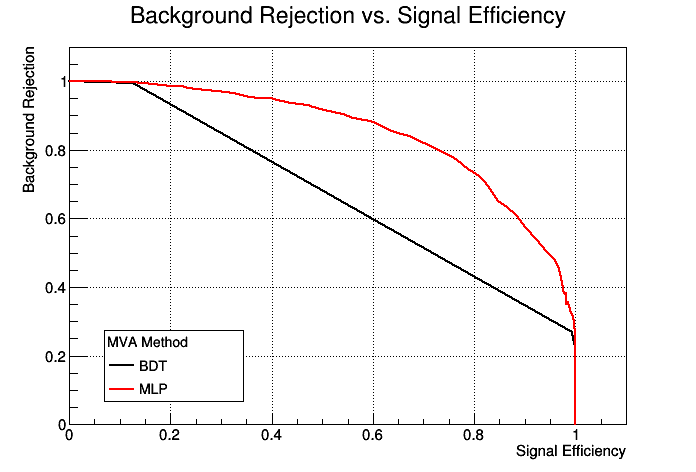

In [12]:
c = factory.GetROCCurve(myloader)
c.Draw()
print "==> TMVAClassification is done!"
outputFile.Close()